# Regression

## Load useful packages

Before we start, let's load some packages: [numpy](https://numpy.org) (for matrix manipulations), [cvxpy](https://www.cvxpy.org) (convex optimisation) and [matplotlib](https://matplotlib.org) (plotting).

Note: if you are using anaconda python you may not have cvxpy installed by default. Install it using the command ``conda install -c conda-forge cvxpy``. You may also need to install matplotlib using ``conda install matplotlib``.

In [4]:
import numpy as np
from cvxpy import *
import matplotlib.pyplot as plt
%matplotlib inline

## Analysing a dataset

Imagine we have some data taken from an experiment and we would like to find a model that fits the data well.

Here is some data I took earlier. Can you figure out a good model for this data? How would you verify that your model is a good fit for the data?

In [5]:
data = np.array([
 [0.0, 3.35982],
 [0.5, 4.45784],
 [1.0, 4.98725],
 [1.5, 5.92751],
 [2.0, 6.99903],
 [2.5, 8.37272],
 [3.0, 9.22212],
 [3.5, 9.72170],
 [4.0, 11.0244],
 [4.5, 11.7995],
 [5.0, 13.0831]])

The first thing we should do is try to plot the data to see if we can recognise anything

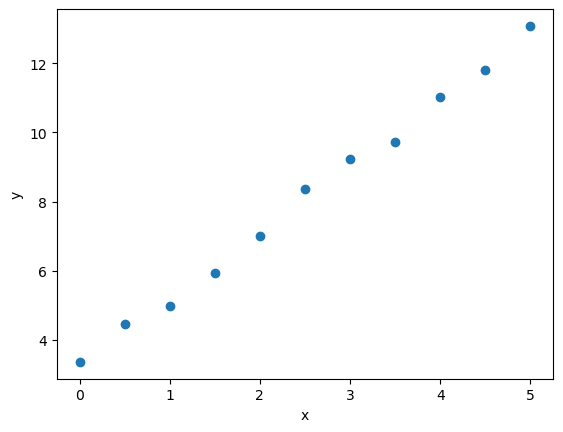

In [6]:
p1 = plt.plot(data[:,0],data[:,1],'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

If we have a good idea for a model that might fit the data, then we can use *regression* to look for the parameters that best fit the data. This looks like the plot of a straight line, $y(x)= a x + b$ so let's try to fit a linear model of that form to the data. To do so, we can we can use our data samples to write an (overdetermined) linear system of equations $ X \beta = y$ where
$$ X = \begin{pmatrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix}, \quad y = \begin{pmatrix} y(x_1) \\ \vdots \\ y(x_n) \end{pmatrix}, \quad \beta = \begin{pmatrix} a \\ b \end{pmatrix}$$
This does not have a solution because it is an overdetermined system, or equivalently because the points don't all sit exactly on a line. Instead, we can try to find the line that "best" fits the data. If we define "best" to mean the line that minimises the square of the 2-norm $||X\beta - y||^2$ then this leads us to regression, in which we instead solve the system $X^T X \beta = X^T y$, which does have a solution for $\alpha$ and $\beta$.

To formulate this as an optimisation problem, consider the system of equations:
$$ y = X \begin{pmatrix} \alpha \\ \beta \end{pmatrix} + \epsilon$$
where $\epsilon$ is a vector of vertical distances of the points from the best fit line.
Then, the optimisation problem is
$$\min_{\beta} || \epsilon ||^2$$

## Tasks

1. Solve this using gradient descent with the optimal step-size.
2. Solve this problem using cvxpy.